# Phase 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [4]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


DROPPING SOME COLUMNS WHICH ARE NOT REQUIRED FOR OUR CLUSTERING ANALYSIS!!

In [6]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [7]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'
        

In [8]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [9]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [10]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [12]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [13]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [49]:
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [15]:
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [16]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']

In [17]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [18]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [19]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [20]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [21]:
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [22]:
districtwise_sttot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [23]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [24]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [25]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [26]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [27]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [28]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [29]:
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [30]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [31]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [32]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [33]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [34]:
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [35]:
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


Merging the above dataset

In [51]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [52]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [53]:
cluster

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,2012,32,21,123,3,29,3,9,0,3,812,0,8,44,552


# CLUSTERING USING THE KMEANS!!

In [54]:
x=cluster.iloc[:,2:]

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [57]:
y_kmeans=kmeans.fit_predict(x)

# Create DataFrame for each cluster that shows data according to the areas.

# REGION 1) Peaceful Area's!!

In [58]:
peaceful_regions=cluster[y_kmeans==0]

In [59]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
12,ANDHRA PRADESH,GUNTAKAL RLY.,24078,75,3,10,15,31,0,4,66,2,75,7,0,7,57
28,ANDHRA PRADESH,SECUNDERABAD RLY.,24078,104,7,9,8,54,6,16,169,2,138,9,2,1,53
33,ANDHRA PRADESH,VIJAYAWADA RLY.,24078,32,4,9,7,34,2,14,99,1,146,12,1,9,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,PURAB MIDNAPUR,22077,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61


# REGION 2) MODERATE Area's!!

In [60]:
moderate_regions=cluster[y_kmeans==1]

In [61]:
moderate_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
5,A & N ISLANDS,SOUTH,2012,8,8,7,4,1,65,8,1,4,50,0,4,19,36
14,ANDHRA PRADESH,GUNTUR URBAN,6033,150,69,100,6,62,416,23,14,33,2398,139,24,127,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,WEST BENGAL,BKP CP,2012,89,36,214,16,48,9,125,3,0,143,0,2,22,1336
807,WEST BENGAL,HOWRAH CITY,14038,201,110,392,34,176,76,406,19,31,690,2,1,91,2247
810,WEST BENGAL,JHARGRAM,2012,30,21,21,10,19,3,52,1,1,11,0,2,6,123
814,WEST BENGAL,MIDNAPUR,2001,120,84,74,16,59,39,363,1,23,63,0,0,0,741


# REGION 3) SENSITIVE Area's!!

In [62]:
sensitive_regions=cluster[y_kmeans==2]

In [63]:
sensitive_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002
10,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WEST BENGAL,24 PARGANAS NORTH,24078,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376
795,WEST BENGAL,24 PARGANAS SOUTH,24078,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115
812,WEST BENGAL,KOLKATA,24078,596,433,1534,151,1007,1434,2993,480,0,19434,17,1,1730,9797
815,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004


# Analyse your clusters and prepare a report that explains all your observations

# 10 MOST SAFE AREAS!!

In [64]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

In [65]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [66]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,DELHI,IGI AIRPORT,16068,8,1,35,1,21,5,3,6,0,6,3,0,14,50,16221
1,ASSAM,CHIRANG,16068,214,199,281,51,55,265,184,8,82,252,0,0,0,952,18611
2,RAJASTHAN,G.R.P.,18045,44,11,40,15,61,20,57,11,4,36,28,5,89,178,18644
3,ASSAM,UDALGURI,16068,325,219,395,71,101,421,189,11,127,720,0,28,0,939,19614
4,ARUNACHAL PRADESH,UPPER DIBANG VALLEY,20075,12,0,2,0,2,32,5,0,0,18,0,1,1,2,20150
5,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11,20150
6,ARUNACHAL PRADESH,K/KUMEY,20075,41,17,17,6,4,55,4,0,5,73,0,26,4,37,20364
7,CHHATTISGARH,DANTEWARA,18051,598,103,67,79,23,439,148,2,71,523,15,71,126,298,20614
8,CHHATTISGARH,NARAYANPUR,20075,187,25,28,86,16,64,5,1,61,191,1,13,11,67,20831
9,HARYANA,MEWAT,16068,167,264,193,98,119,300,892,9,36,925,55,0,190,1706,21022


10 MOST SENSITIVE AREAS!!

In [67]:
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

In [68]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [69]:
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)

In [70]:
sensitive

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,ANDHRA PRADESH,HYDERABAD CITY,24078,1455,712,1466,121,942,13435,2432,311,433,47343,1293,76,872,19685,114654
1,KARNATAKA,BANGALORE COMMR.,24078,2831,642,3014,529,6740,19968,4665,772,48,37973,1423,16,675,9010,112384
2,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411,88316
3,ANDHRA PRADESH,KARIMNAGAR,24078,1674,853,1534,91,344,3258,2011,62,685,31334,3331,505,2406,16110,88276
4,MAHARASHTRA,MUMBAI COMMR.,14063,1542,1386,1334,226,3209,19916,2364,708,218,28353,186,11,2865,9304,85685
5,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004,82951
6,MADHYA PRADESH,JABALPUR,24078,1008,1285,484,19,1174,6035,1137,40,240,35159,952,649,1203,7855,81318
7,MADHYA PRADESH,INDORE,24078,1339,1255,625,73,2326,11729,1616,59,507,20260,1139,421,4401,10392,80220
8,GUJARAT,AHMEDABAD COMMR.,24078,1204,506,2301,471,5292,9392,2434,146,79,16439,798,41,1435,14973,79589
9,MADHYA PRADESH,SAGAR,24078,951,1502,525,18,601,4879,1231,3,447,31377,2324,731,1648,8956,79271


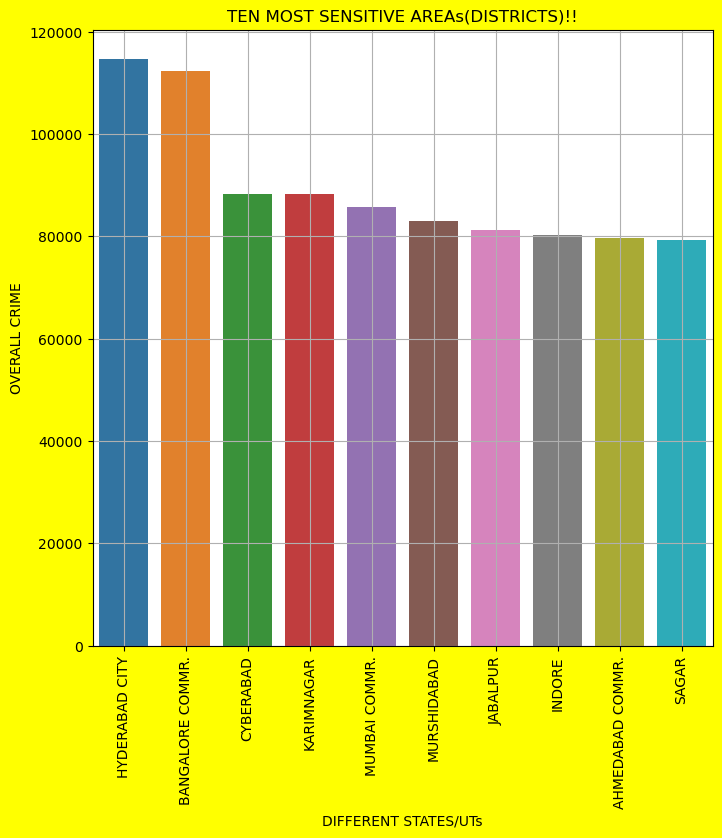

In [71]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

# What is impacting more crimes in sensitive areas?

In [72]:
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

<Figure size 2500x9000 with 0 Axes>

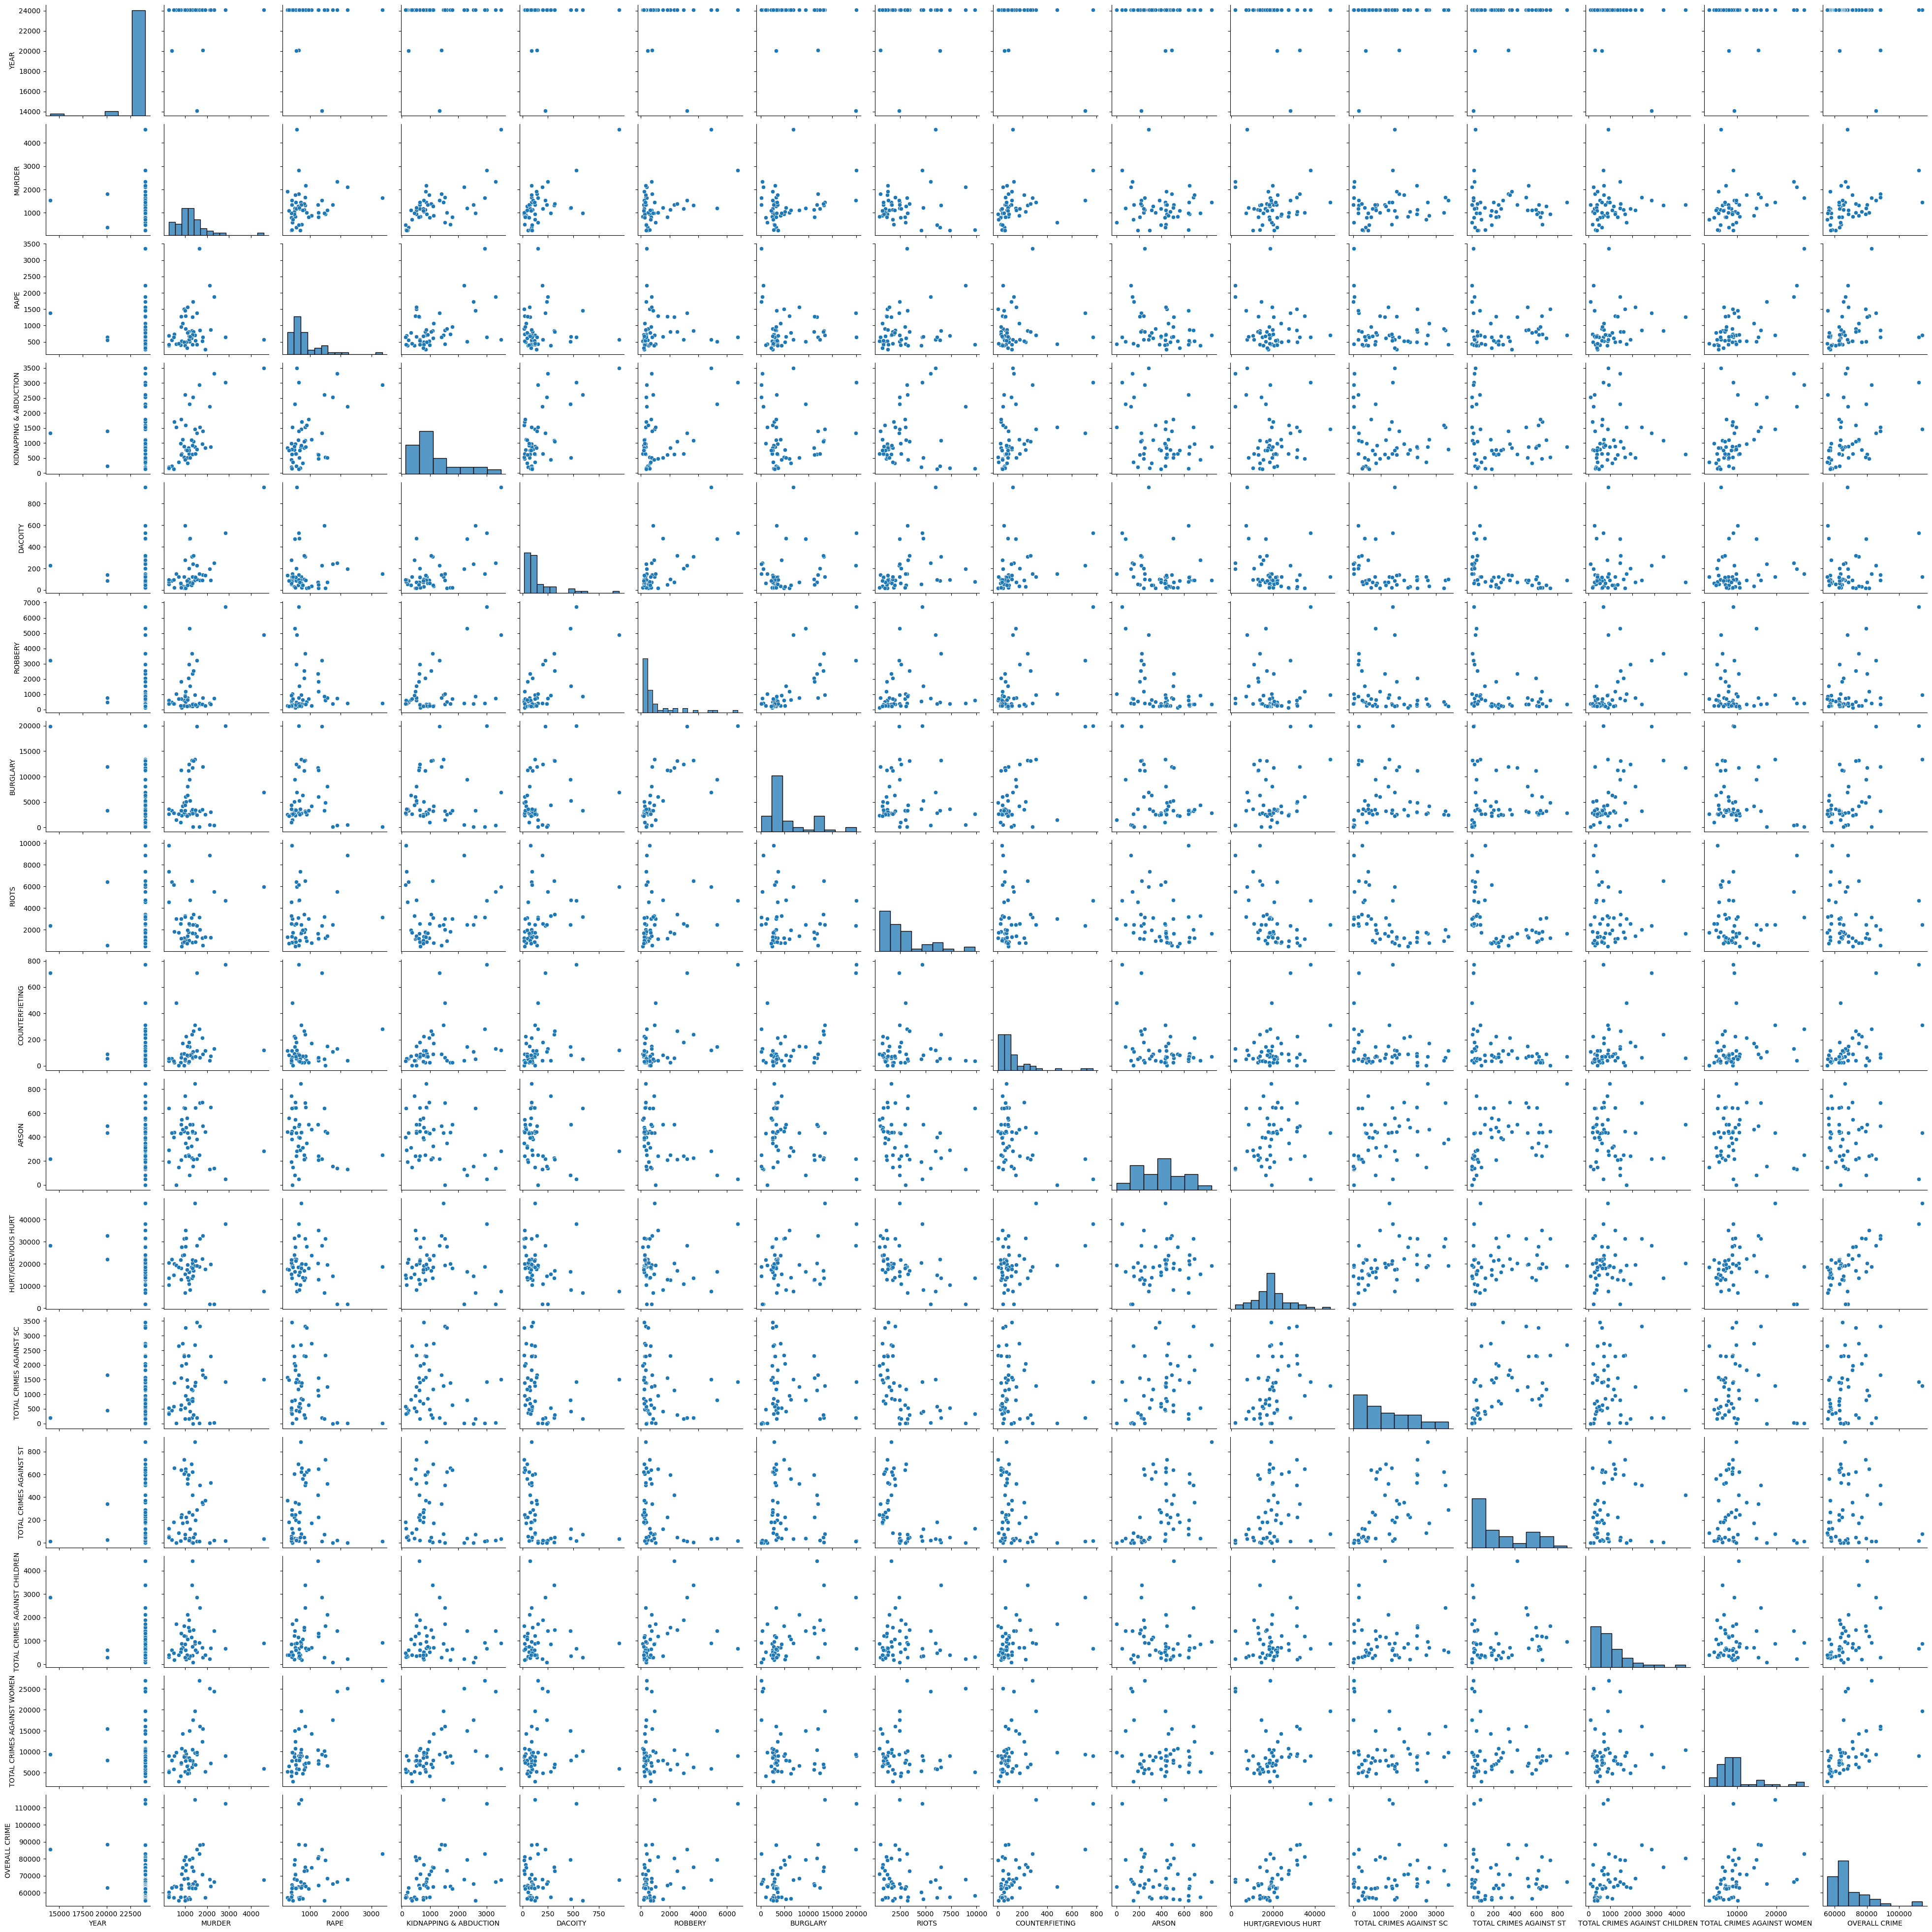

In [73]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

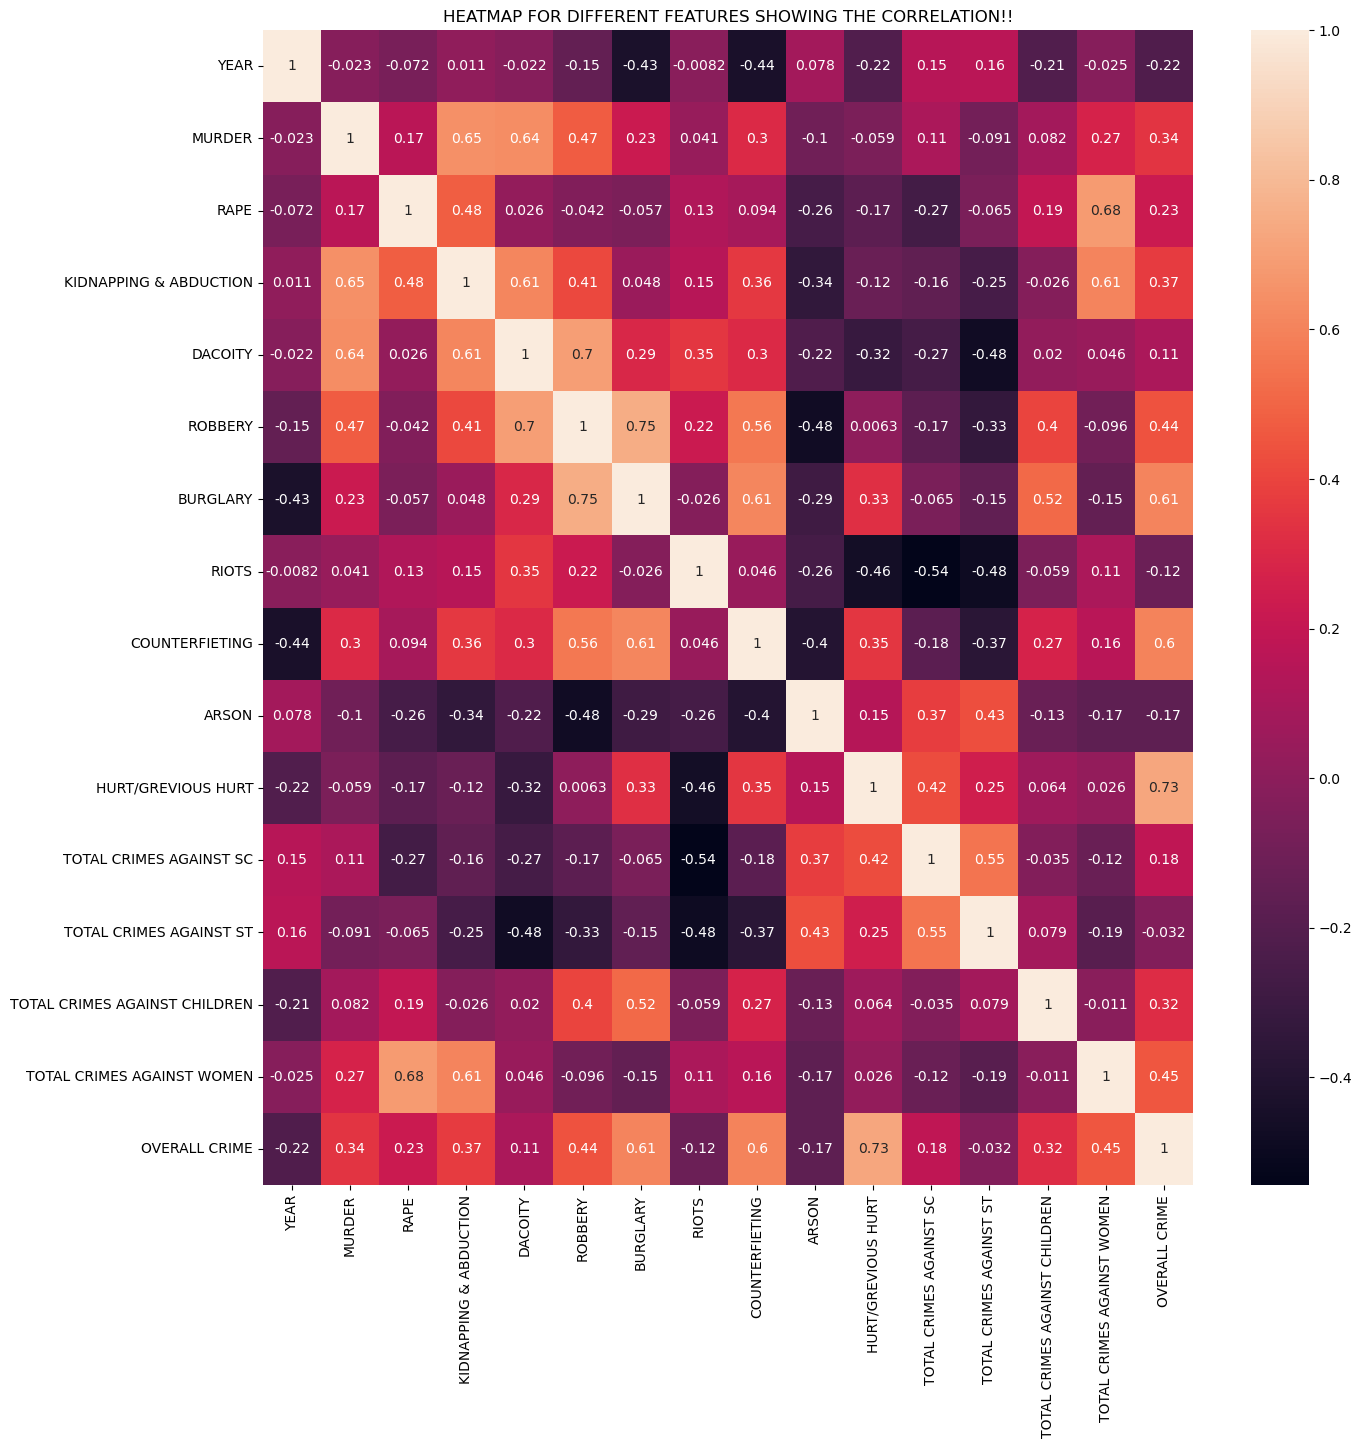

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()


THE HEATMAP DESCRIBING THE CORRELATION FOR DIFFERENT FEATURES CAN BE SEEN FROM THE ABOVE PLOT!!

# What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated trouble from colorful stakeholders, including the government, law enforcement agencies, civil society associations, and the general public. Then are some measures that can help reduce crime in India Strengthen law enforcement The government needs to allocate further coffers and finances to law enforcement agencies to ameliorate their capacity to help and probe crimes. Police reforms should be enforced to make the force more responsible, effective, and effective. Address socio- profitable factors Poverty, severance, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job openings, perfecting access to education, and furnishing introductory amenities like water, electricity, and healthcare. Strengthen the justice system The justice system in India is frequently slow and hamstrung, which can lead to frustration and disillusionment among the public. way should be taken to streamline the justice system and make it more responsive to the requirements of the people. Raise public mindfulness People should be made apprehensive of the consequences of crime and the significance of reporting crime. mindfulness juggernauts should be conducted to educate people about their rights and liabilities. Ameliorate community policing Community policing can help make trust between the police and the community, leading to better crime forestallment and disquisition. The police should work nearly with the community to identify and address original issues. Use technology Technology can play a significant part in precluding and working crimes. The government should invest in contemporizing the police force with advanced technology like CCTV cameras, drones, and digital forensics. Reform the captivity system The captivity system in India is overcrowded and inhuman, which can lead to the farther radicalization of convicts. The government needs to take way to ameliorate the conditions in incarcerations and give convicts with access to education and vocational training.

# Capstone project overall story in your own words.

India is a different country with a population of over1.38 billion people, and crime is a significant issue that affects its citizens. According to the data available from the National Crime Records Bureau( NCRB) for the time 2011, 

Initially confused about the data collection portion as well, but as soon as got to work on the project, began to understand and made some assumptions. For example, discovered that the population and literacy rates for each state were only provided for the years 2001 and 2011, so calculated the growth rate to find the population and literacy rates for each state annually.

The examination of the information required to add a few columns which took some time, such as Population in Rural/Urban Area, Total Male, Total Female, Population Literacy, Male Literacy, Female Literacy, Area of Each State, and Different Crimes, murders, riots, dowry deaths, rapes, arson, and the total number of crimes committed against women, children, SCs, and STs.

Entered the Second Phase after gathering data for every column from 2001 to 2012.

Phase 2 involved analyzing state-by-state data for various crimes and identifying the states and territories that were more and less likely to experience crime.Several plots and charts were used to analyze the dataset.

Opened the CSV file, saved it in a dataframe, looked for Info() and null values, and then proceeded as necessary.

Crimes against women, including rape, sexual importunity, and domestic violence, continue to be a major concern in India. In 2011, there were reported cases of crimes against women, andsome of  these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public mindfulness, crimes against women remain a patient problem in India. Crimes against children including rape, hijacking and hijacking , murder, traffacking, importation of girl are still the commanding enterprises in India. In 2011, there were 33,049 reported cases of crimes against children, and among differnt crimes againstchildren, Even after colorful laws and stricter law enforcements being made to control the crimes against children a increase  can be seen from the time 2001 to 2011. . Involvement of kids can also be seen as a serious trouble to thesociety.Often deceived, mishandled the kids tends towards to conclude the wrong ways. As its easy to impact them stricter laws should be made to overcome thisissue. mortal right violation by the police too offers significant quantum of share in total ipccrimes.Year 2009 have the utmost cases recorded in any time. There'sdrop in the cases from the time 2001 to 2011. Chattisgarh have the utmost cases of mortal right violation across the countries 2001 to 2011. Its also important to note that those who have the duty of maintaining the law and order in the state i, e the police department have also the cases of getting assaulted by theRioutous_mob, crazies, in counter insurrection operation, border opeartions and numerousmore.

In addition to this, the government also needs to address the issue of corruption within the police force. This is rampant in many parts of India and officers are not held accountable for their actions. This leads to a lack of trust in the police and leads to more people taking matters into their own hands instead of relying on the police for protection. There is also a need to provide better training for police officers. This can help them to better understand their roles and responsibilities and to be prepared for different types of situations. This can also help them to be more effective in their work and to serve the public better. Furthermore, there should be an officer so that they can handle difficult situations with sensitivity and understanding. Finally, more resources need to be allocated towards increasing public awareness around crime prevention, as this is key in helping reduce crime rates.

Overall, it is clear that there are still many challenges facing India when it comes to crime. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address the socio-economic factors that contribute to crime. In addition, there needs to be more focus on reducing corruption within the police force and providing better training for officers. Furthermore, resources should be allocated towards increasing public awareness around crime prevention to reduce crime rates. With these steps in place, India can start to make progress toward reducing crime and improving safety for its citizens.